# Reading .mat Files

In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import mne, glob
import random

In [2]:
mat_files = glob.glob("*.mat")
data = {}
mat_files = [fn for fn in mat_files if "HFREQ" not in fn]
mat_files

['5F-SubjectA-160405-5St-SGLHand.mat',
 '5F-SubjectB-151110-5St-SGLHand.mat',
 '5F-SubjectB-160316-5St-SGLHand.mat',
 '5F-SubjectC-151204-5St-SGLHand.mat',
 '5F-SubjectF-151027-5St-SGLHand.mat',
 '5F-SubjectF-160209-5St-SGLHand.mat']

In [3]:
annots = [loadmat(fn) for fn in mat_files]
# annots = [annots[2], annots[3], annots[4]] # exclude a
# annots = [annots[0], annots[3], annots[4]] # exclude b
# annots = [annots[2], annots[3], annots[0]] # exclude f
# annots = [annots[2], annots[4], annots[0]] # exclude c

annots = [annots[0]] # A
annots = [annots[2]] # B
annots = [annots[3]] # C
annots = [annots[4]] # F

In [4]:
len(annots[0]["o"][0][0][5])

718600

In [5]:
merged = {
    "__header__": "Merged Files",
    "__version__": "1.0",
    "__globals__": [],
    "o": annots[-1]["o"]
}

for i in range(len(annots)-1):
#     print(annots[i]["o"][0][0][5])
    # merging values
    merged["o"][0][0][5] = np.concatenate((merged["o"][0][0][5], annots[i]["o"][0][0][5]))
    # mergin events
    merged["o"][0][0][4] = np.concatenate((merged["o"][0][0][4], annots[i]["o"][0][0][4]))



In [6]:
len(merged["o"][0][0][5])

718600

In [7]:
# annots = loadmat('5F-SubjectB-160316-5St-SGLHand.mat')
# annots = loadmat('5F-SubjectF-160209-5St-SGLHand.mat')
# annots = loadmat('5F-SubjectF-151027-5St-SGLHand.mat')

In [8]:
unique, counts = np.unique(merged['o'][0][0][4], return_counts=True)
dict(zip(unique, counts))

{0: 419769,
 1: 54548,
 2: 44661,
 3: 51445,
 4: 49871,
 5: 49058,
 91: 48011,
 92: 206,
 99: 1031}

In [9]:
# annots['o'][0][0][7]

In [10]:
# len(annots['o'][0][0][5]) # values

In [11]:
# annots['o'][0][0][4] # events

# Extracting events and values

In [12]:
events = [[1], [2], [3], [4], [5]]

real_events = []
real_vals = []

for i, event in enumerate(merged['o'][0][0][4]):
    if event in events:
        real_vals.append(merged['o'][0][0][5][i])
        real_events.append(merged['o'][0][0][4][i])

In [13]:
real_events

[array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], dtype=uint8),
 array([1], 

In [14]:
from itertools import chain

real_events = list(chain.from_iterable(real_events))

In [15]:
real_events[-1]

5

In [16]:
left = 0
non_repeating_events = []
indexes = []

# 11115555
real_events.append(-1)

for right in range(1, len(real_events)):
    if real_events[right] != real_events[left]:
        indexes.append(left) # appends the end; @ index 0, event = 1
        non_repeating_events.append(real_events[left])
        print(left, real_events[left])
    
    left += 1

561 1
822 4
1081 2
1341 5
1600 1
2115 5
2374 3
2889 4
3148 5
4179 4
4439 2
4698 1
4958 4
5218 5
5478 3
5739 4
5998 1
6259 3
6778 4
7037 1
7297 5
7556 3
7815 4
8074 3
8336 5
8597 3
8858 1
9630 5
9892 1
10152 4
10410 2
10672 3
10930 5
11192 4
11452 2
11713 1
11975 3
12235 5
12493 3
13009 1
13271 2
13532 1
13793 2
14053 4
14313 3
14575 2
14834 1
15093 3
15870 1
16131 5
16391 1
16650 2
16909 3
17427 1
17686 5
17945 3
18204 5
18464 2
18724 3
18984 2
19244 1
19504 3
19764 5
20026 3
20542 2
20802 4
21062 2
21323 1
21582 5
21844 3
22104 2
22366 5
22625 1
23142 4
23404 3
23920 4
24180 2
24440 4
24699 5
25473 3
25733 5
25992 4
26254 5
26514 2
26773 5
27036 4
27297 2
27556 3
27815 5
28585 2
28845 3
29104 5
29364 3
29622 2
29881 3
30141 4
30658 2
30920 3
31179 1
31697 5
31957 3
32216 2
32474 5
32988 3
33248 4
33509 2
33771 1
34030 5
34290 1
34550 2
35071 1
35334 3
35593 4
35852 5
36114 4
36374 1
36634 3
36893 5
37152 4
37411 5
37670 1
37932 5
38194 3
38454 5
38715 3
39237 1
39498 3
39761 5
40277 4

In [17]:
indexes = [0] + indexes
indexes

[0,
 561,
 822,
 1081,
 1341,
 1600,
 2115,
 2374,
 2889,
 3148,
 4179,
 4439,
 4698,
 4958,
 5218,
 5478,
 5739,
 5998,
 6259,
 6778,
 7037,
 7297,
 7556,
 7815,
 8074,
 8336,
 8597,
 8858,
 9630,
 9892,
 10152,
 10410,
 10672,
 10930,
 11192,
 11452,
 11713,
 11975,
 12235,
 12493,
 13009,
 13271,
 13532,
 13793,
 14053,
 14313,
 14575,
 14834,
 15093,
 15870,
 16131,
 16391,
 16650,
 16909,
 17427,
 17686,
 17945,
 18204,
 18464,
 18724,
 18984,
 19244,
 19504,
 19764,
 20026,
 20542,
 20802,
 21062,
 21323,
 21582,
 21844,
 22104,
 22366,
 22625,
 23142,
 23404,
 23920,
 24180,
 24440,
 24699,
 25473,
 25733,
 25992,
 26254,
 26514,
 26773,
 27036,
 27297,
 27556,
 27815,
 28585,
 28845,
 29104,
 29364,
 29622,
 29881,
 30141,
 30658,
 30920,
 31179,
 31697,
 31957,
 32216,
 32474,
 32988,
 33248,
 33509,
 33771,
 34030,
 34290,
 34550,
 35071,
 35334,
 35593,
 35852,
 36114,
 36374,
 36634,
 36893,
 37152,
 37411,
 37670,
 37932,
 38194,
 38454,
 38715,
 39237,
 39498,
 39761,
 40

In [18]:
left = 0
right = 1
maximum = -float('inf')
minimum = float('inf')
event_duration = []
while right < len(indexes):
    maximum = max(indexes[right] - indexes[left], maximum)
    minimum = min(indexes[right] - indexes[left], minimum)
    print(indexes[right] - indexes[left])
    event_duration.append(indexes[right] - indexes[left])
    right += 1
    left += 1


561
261
259
260
259
515
259
515
259
1031
260
259
260
260
260
261
259
261
519
259
260
259
259
259
262
261
261
772
262
260
258
262
258
262
260
261
262
260
258
516
262
261
261
260
260
262
259
259
777
261
260
259
259
518
259
259
259
260
260
260
260
260
260
262
516
260
260
261
259
262
260
262
259
517
262
516
260
260
259
774
260
259
262
260
259
263
261
259
259
770
260
259
260
258
259
260
517
262
259
518
260
259
258
514
260
261
262
259
260
260
521
263
259
259
262
260
260
259
259
259
259
262
262
260
261
522
261
263
516
517
259
520
259
261
262
261
262
517
259
261
259
260
259
518
260
518
262
260
260
259
260
262
260
260
260
519
518
262
259
260
259
520
520
260
518
515
259
515
262
259
262
260
515
774
259
518
259
259
259
259
516
259
516
259
262
262
259
259
260
515
515
260
263
515
517
262
262
521
261
259
259
259
260
261
1035
260
259
260
260
260
262
262
259
260
259
260
259
260
261
262
261
776
259
516
515
259
259
259
259
260
260
260
259
516
260
517
258
260
260
516
516
261
262
262
260
261
260
518
259
26

In [19]:
print(minimum)
print(maximum)

print(1029/260)

258
1285
3.957692307692308


In [20]:
merged['o'][0][0][6] # channels

array([[array(['Fp1'], dtype='<U3')],
       [array(['Fp2'], dtype='<U3')],
       [array(['F3'], dtype='<U2')],
       [array(['F4'], dtype='<U2')],
       [array(['C3'], dtype='<U2')],
       [array(['C4'], dtype='<U2')],
       [array(['P3'], dtype='<U2')],
       [array(['P4'], dtype='<U2')],
       [array(['O1'], dtype='<U2')],
       [array(['O2'], dtype='<U2')],
       [array(['A1'], dtype='<U2')],
       [array(['A2'], dtype='<U2')],
       [array(['F7'], dtype='<U2')],
       [array(['F8'], dtype='<U2')],
       [array(['T3'], dtype='<U2')],
       [array(['T4'], dtype='<U2')],
       [array(['T5'], dtype='<U2')],
       [array(['T6'], dtype='<U2')],
       [array(['Fz'], dtype='<U2')],
       [array(['Cz'], dtype='<U2')],
       [array(['Pz'], dtype='<U2')],
       [array(['X5'], dtype='<U2')]], dtype=object)

In [21]:
channel_names = [channel[0][0] for channel in merged['o'][0][0][6]]
sfreq = merged['o'][0][0][2][0][0] # sfreq
EEG_data = merged['o'][0][0][5]
EEG_data = np.transpose(EEG_data)
n_channels, n_samples = EEG_data.shape 
event_codes = merged['o'][0][0][4]
cl_lab = ["Thumb", "Index finger", "Middle finger", "Ring finger", "Pinkie finger"]

In [22]:
print("EEG_data shape: ", EEG_data.shape)
print("Channels: " , channel_names)
print("Sampling frequency: ", sfreq)
print("Num of Samples: ", n_samples)
print("Num of Channels: ", n_channels)
print("Event codes: ", np.unique(event_codes))
print("Class names: ", cl_lab)

# Fp1, Fp2 => AF3, AF4
# Keep F3 and F4
# 'C3', 'C4' => FC5, FC6
# T5, T6 => P7, P8
# Keep O1 and O2
# Keep F7 and F8
# Keep T3 and T4

# Drop A1 and A2
# Drop P3, P4

# ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6']


EEG_data shape:  (22, 718600)
Channels:  ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'X5']
Sampling frequency:  200
Num of Samples:  718600
Num of Channels:  22
Event codes:  [ 0  1  2  3  4  5 91 92 99]
Class names:  ['Thumb', 'Index finger', 'Middle finger', 'Ring finger', 'Pinkie finger']


In [23]:
EEG_data = merged['o'][0][0][5]
EEG_concat = EEG_data
# EEG_data = np.transpose(EEG_data)
EEG_concat = np.concatenate((EEG_data, event_codes), axis=1)
EEG_concat = np.transpose(EEG_concat)

In [24]:
# EEG_concat = np.transpose(EEG_concat)

# Converting to mne.raw

In [25]:
info = mne.create_info(channel_names + ["events"], sfreq, 'eeg')
info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1, A2, F7, F8, T3, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 23
 projs: []
 sfreq: 200.0 Hz
>

In [26]:
simulated_raw = mne.io.RawArray(EEG_concat, info)
raw_df = simulated_raw.to_data_frame() # multiplies numbers by 1M??

Creating RawArray with float64 data, n_channels=23, n_times=718600
    Range : 0 ... 718599 =      0.000 ...  3592.995 secs
Ready.


In [27]:
simulated_raw.to_data_frame()

,time,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,...,F8,T3,T4,T5,T6,Fz,Cz,Pz,X5,events
0,0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
1,5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
2,10,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
3,15,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
4,20,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718595,3592975,162970000.0,49480000.0,1250000.0,-6230000.0,-1800000.0,1720000.0,120000.0,-9760000.0,-14140000.0,...,35310000.0,10000.0,-8770000.0,270000.0,-11380000.0,2260000.0,-670000.0,-4820000.0,-1450000.0,0.0
718596,3592980,146640000.0,33740000.0,-580000.0,-5670000.0,-4280000.0,2320000.0,-950000.0,-7920000.0,-15190000.0,...,23990000.0,-1120000.0,-5470000.0,-1080000.0,-4690000.0,560000.0,-2310000.0,-5610000.0,-1210000.0,0.0
718597,3592985,156280000.0,41490000.0,630000.0,-7260000.0,-3650000.0,3140000.0,-3050000.0,-9540000.0,-17810000.0,...,17650000.0,7630000.0,-2310000.0,490000.0,-10630000.0,2060000.0,-3250000.0,-8500000.0,-1170000.0,0.0
718598,3592990,163560000.0,45570000.0,2930000.0,-8370000.0,510000.0,-1930000.0,-530000.0,-10870000.0,-15960000.0,...,20000000.0,14360000.0,-15180000.0,7420000.0,-13200000.0,700000.0,-3580000.0,-8920000.0,-1250000.0,0.0


In [28]:
# simulated_raw.__dict__["_data"]
# np.savetxt("raw_data.csv", simulated_raw.__dict__["_data"], delimiter=",")

In [29]:
# raw_df.to_csv("raw_df.csv")

In [30]:
# CONVERTING TO FIF
# simulated_raw.save("testing_fif.fif", overwrite=True, fmt='double')

In [31]:
# temp = np.transpose(real_vals)

# print(type(temp.dtype))
# # print(real_vals)

In [32]:
real_vals[0:]

[array([-1.64,  3.27,  2.3 ,  2.61,  0.26, -1.05, -0.8 ,  0.83,  5.71,
         5.87,  5.74,  4.71,  4.26,  5.83, -2.74,  0.81,  4.47,  1.78,
         3.65,  3.82,  0.17, 11.03]),
 array([ 1.28,  2.85,  2.2 ,  2.6 ,  0.77, -1.93,  1.45, -0.23,  6.26,
         6.15,  9.04, 10.5 ,  5.67,  4.48, -1.76,  1.67,  6.4 ,  1.57,
         4.67,  4.45,  1.75, 24.11]),
 array([ 2.92,  3.46,  5.19,  3.86,  1.96, -3.21,  0.29, -3.69,  4.25,
         2.35, 11.07,  4.97,  8.49,  5.82,  1.29, -2.3 ,  5.19, -2.8 ,
         5.02,  5.21,  0.95, 28.39]),
 array([-9.100e-01,  2.430e+00,  3.580e+00,  3.510e+00,  2.970e+00,
        -4.970e+00, -2.300e-01, -5.630e+00,  1.790e+00, -3.240e+00,
         8.620e+00,  3.680e+00,  5.550e+00,  5.400e+00,  3.500e-01,
        -2.920e+00,  2.990e+00, -4.870e+00,  4.420e+00,  5.450e+00,
        -1.000e-02,  2.856e+01]),
 array([-1.93,  1.6 ,  1.87,  2.83,  3.11, -4.48, -4.07, -7.57, -2.51,
        -8.05,  5.53,  3.22,  4.28,  4.41,  1.09, -3.66, -1.54, -6.72,
         3.9

In [33]:
# x = temp[0:22, 0:indexes[0] + 1]
# type(x)
# y = temp[0:22, indexes[0]+1:indexes[1] + 1]
# y

# print(x.shape)
# print(y.shape)

# x = np.transpose(x)
# y = np.transpose(y)
# z = np.concatenate([x, y])
# print(z)

# Converting to basedataset

In [34]:
from braindecode.datasets import create_from_X_y, BaseDataset, BaseConcatDataset

base_data = BaseConcatDataset([simulated_raw], target_transform=None)

In [35]:
base_data = []
for d in [simulated_raw]:
    base_data.append(BaseDataset(d))

In [36]:
concat_base_data = BaseConcatDataset(base_data)

In [37]:
concat_base_data.datasets[0].raw.__dict__["_data"]

array([[ -0.  ,  -0.  ,  -0.  , ..., 156.28, 163.56, 144.27],
       [ -0.  ,  -0.  ,  -0.  , ...,  41.49,  45.57,  32.3 ],
       [ -0.  ,  -0.  ,  -0.  , ...,   0.63,   2.93,   2.52],
       ...,
       [ -0.  ,  -0.  ,  -0.  , ...,  -8.5 ,  -8.92,  -9.56],
       [ -0.  ,  -0.  ,  -0.  , ...,  -1.17,  -1.25,  -0.89],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

# Preprocessing

In [38]:
from braindecode.preprocessing import (
    exponential_moving_standardize, preprocess, Preprocessor, scale)

# original
low_cut_hz = 4.  # low cut frequency for filtering
high_cut_hz = 38.  # high cut frequency for filtering

# Parameters for exponential moving standardization
factor_new = 1e-3
init_block_size = 1000

preprocessors = [
    Preprocessor(fn='pick_channels', ch_names=['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6']), # Select 14 out 22 Channels
#     Preprocessor(fn='resample', sfreq=128), # Resample to 128Hz,
    Preprocessor('filter', l_freq=low_cut_hz, h_freq=high_cut_hz),  # Bandpass filter
    Preprocessor('pick_types', eeg=True, meg=False, stim=False),  # Keep EEG sensors
#     Preprocessor(scale, factor=1e6, apply_on_array=True),  # Convert from V to uV
    Preprocessor(exponential_moving_standardize,  # Exponential moving standardization
                 factor_new=factor_new, init_block_size=init_block_size)
]

# Transform the data
preprocess(concat_base_data, preprocessors)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 331 samples (1.655 sec)



In [39]:
dataDF1 = [d.raw.to_data_frame(scalings=dict(eeg=1, mag=1, grad=1))
              for i, d in enumerate(concat_base_data.datasets)]

# dataDF2 = [d.to_data_frame().loc[:,
#             ['MarkerIndex']]
#               for i, d in enumerate(data)]

In [40]:
# dataDF1 = dataDF1[0][channel_names]/1000000
dataDF1

[           time       Fp1       Fp2        F3        F4        C3        C4  \
 0             0  0.002684  0.001679  0.005092  0.001656  0.002090 -0.001984   
 1             5  0.002684  0.001679  0.005092  0.001656  0.002090 -0.001984   
 2            10  0.002684  0.001679  0.005092  0.001656  0.002090 -0.001984   
 3            15  0.002684  0.001679  0.005092  0.001656  0.002090 -0.001984   
 4            20  0.002684  0.001679  0.005092  0.001656  0.002090 -0.001984   
 ...         ...       ...       ...       ...       ...       ...       ...   
 718595  3592975 -0.088133  0.269070 -0.136636 -0.809061 -0.515498  0.332756   
 718596  3592980  0.223006  0.494341 -0.117731 -1.174000 -0.724965  0.497768   
 718597  3592985  0.502763  0.610353 -0.045339 -1.311878 -0.694254  0.474257   
 718598  3592990  0.412416  0.416694  0.009496 -0.898358 -0.408763  0.271443   
 718599  3592995 -0.000154 -0.003191  0.001773  0.002253  0.006865 -0.004807   
 
               O1        O2        F7 

In [41]:
dataDF1[0]["events"] = event_codes

In [42]:
dataDF1[0]
backup_dataDF1 = dataDF1

# Splitting Events

2 seconds @ 200 Hz => 400 samples per group

In [43]:
dataDF1[0] = dataDF1[0][dataDF1[0].events != 0]
dataDF1[0] = dataDF1[0][dataDF1[0].events != 91]
dataDF1[0] = dataDF1[0][dataDF1[0].events != 92]
dataDF1[0] = dataDF1[0][dataDF1[0].events != 99]

In [44]:
# sum = 561 + 260
# dataDF1[0][sum + 256 * 0 : sum + 256 + 256 * 0]

In [45]:
# 36059 -> last row of second "1"
# 36595 -> start of first "4", which is after 1

In [46]:
DATA = []
temp_times = []
sum = 1

for i, e in enumerate(event_duration):
    times = e // 256
    for j in range(times):
        DATA.append(dataDF1[0][sum + 256 * j : sum + 256 + 256 * j])
    sum += e
    temp_times.append(times)

# Events

In [47]:
DATA[0]["events"][0:1].values[0]

1

In [48]:
events = []
for d in DATA:
    events.append(d["events"][0:1].values[0])

In [49]:
type(events[0])

numpy.uint8

In [50]:
events

[1,
 1,
 4,
 2,
 5,
 1,
 5,
 5,
 3,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 2,
 1,
 4,
 5,
 3,
 4,
 1,
 3,
 4,
 4,
 1,
 5,
 3,
 4,
 3,
 5,
 3,
 1,
 5,
 5,
 5,
 1,
 4,
 2,
 3,
 5,
 4,
 2,
 1,
 3,
 5,
 3,
 1,
 1,
 2,
 1,
 2,
 4,
 3,
 2,
 1,
 3,
 1,
 1,
 1,
 5,
 1,
 2,
 3,
 1,
 1,
 5,
 3,
 5,
 2,
 3,
 2,
 1,
 3,
 5,
 3,
 2,
 2,
 4,
 2,
 1,
 5,
 3,
 2,
 5,
 1,
 4,
 4,
 3,
 4,
 4,
 2,
 4,
 5,
 3,
 3,
 3,
 5,
 4,
 5,
 2,
 5,
 4,
 2,
 3,
 5,
 2,
 2,
 2,
 3,
 5,
 3,
 2,
 3,
 4,
 2,
 2,
 3,
 1,
 5,
 5,
 3,
 2,
 5,
 3,
 3,
 4,
 2,
 1,
 5,
 1,
 2,
 1,
 1,
 3,
 4,
 5,
 4,
 1,
 3,
 5,
 4,
 5,
 1,
 5,
 3,
 5,
 3,
 1,
 1,
 3,
 5,
 4,
 4,
 5,
 5,
 3,
 1,
 1,
 5,
 1,
 3,
 4,
 2,
 1,
 1,
 2,
 3,
 5,
 1,
 2,
 3,
 3,
 2,
 4,
 4,
 1,
 5,
 1,
 5,
 1,
 3,
 1,
 4,
 1,
 3,
 3,
 2,
 2,
 4,
 5,
 4,
 3,
 5,
 5,
 3,
 3,
 1,
 3,
 3,
 4,
 4,
 1,
 3,
 3,
 4,
 3,
 1,
 4,
 1,
 1,
 3,
 3,
 3,
 4,
 2,
 2,
 4,
 2,
 4,
 2,
 4,
 4,
 5,
 3,
 3,
 2,
 3,
 1,
 3,
 2,
 1,
 2,
 2,
 1,
 1,
 4,
 3,
 4,
 4,
 2,
 2,
 4,
 3,
 4,
 4,
 5,
 2,
 3,


In [51]:
# Change Events, so Classes begins with 0
events_newIndex = []
for i,e in enumerate(events):
    if e == 1:
        events_newIndex.append(0)
    elif e == 2:
        events_newIndex.append(1)
    elif e == 3:
        events_newIndex.append(2)
    elif e == 4:
        events_newIndex.append(3)
    elif e == 5:
        events_newIndex.append(4)

In [52]:
events_newIndex

[0,
 0,
 3,
 1,
 4,
 0,
 4,
 4,
 2,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 1,
 0,
 3,
 4,
 2,
 3,
 0,
 2,
 3,
 3,
 0,
 4,
 2,
 3,
 2,
 4,
 2,
 0,
 4,
 4,
 4,
 0,
 3,
 1,
 2,
 4,
 3,
 1,
 0,
 2,
 4,
 2,
 0,
 0,
 1,
 0,
 1,
 3,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 4,
 0,
 1,
 2,
 0,
 0,
 4,
 2,
 4,
 1,
 2,
 1,
 0,
 2,
 4,
 2,
 1,
 1,
 3,
 1,
 0,
 4,
 2,
 1,
 4,
 0,
 3,
 3,
 2,
 3,
 3,
 1,
 3,
 4,
 2,
 2,
 2,
 4,
 3,
 4,
 1,
 4,
 3,
 1,
 2,
 4,
 1,
 1,
 1,
 2,
 4,
 2,
 1,
 2,
 3,
 1,
 1,
 2,
 0,
 4,
 4,
 2,
 1,
 4,
 2,
 2,
 3,
 1,
 0,
 4,
 0,
 1,
 0,
 0,
 2,
 3,
 4,
 3,
 0,
 2,
 4,
 3,
 4,
 0,
 4,
 2,
 4,
 2,
 0,
 0,
 2,
 4,
 3,
 3,
 4,
 4,
 2,
 0,
 0,
 4,
 0,
 2,
 3,
 1,
 0,
 0,
 1,
 2,
 4,
 0,
 1,
 2,
 2,
 1,
 3,
 3,
 0,
 4,
 0,
 4,
 0,
 2,
 0,
 3,
 0,
 2,
 2,
 1,
 1,
 3,
 4,
 3,
 2,
 4,
 4,
 2,
 2,
 0,
 2,
 2,
 3,
 3,
 0,
 2,
 2,
 3,
 2,
 0,
 3,
 0,
 0,
 2,
 2,
 2,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 3,
 3,
 4,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 3,
 2,
 3,
 3,
 1,
 1,
 3,
 2,
 3,
 3,
 4,
 1,
 2,


# Create X Signal

In [53]:
fourteen_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6']

In [54]:
# REMOVES THE MarkerIndex COLUMN
data_init = [d.loc[:,
                fourteen_channels]
                   for d in DATA]

In [55]:
data_init[800]

,Fp1,Fp2,F3,F4,C3,C4,O1,O2,F7,F8,T3,T4,T5,T6
609903,-0.364930,-0.617948,-0.318010,-0.740303,0.394706,-0.653792,0.808035,-0.212865,-0.514196,-1.401625,-1.510454,-0.834929,0.495307,-1.281652
609904,-0.473080,-0.441742,-0.270406,-0.242772,0.215929,-0.460096,0.591534,-0.283815,-0.923386,-1.204433,-0.896702,-1.201099,0.139126,-0.826557
609905,-0.517526,-0.098129,-0.402521,0.439319,0.100785,-0.328786,0.096269,-0.351827,-1.473422,-0.362284,0.002959,-1.407604,-0.731122,-0.218553
609906,-0.439120,0.127468,-0.617903,0.867674,0.008274,-0.158172,0.020030,-0.048329,-1.646198,0.412775,-0.075558,-1.017812,-1.184921,0.101922
609907,-0.225314,0.163325,-0.643643,0.981922,-0.165084,0.161330,0.589739,0.503193,-1.075938,0.706417,-1.159859,-0.080579,-0.540180,-0.006531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610154,0.273706,0.140315,0.946537,0.868044,-0.231143,-0.194766,0.123149,0.345236,0.512537,-0.369688,-1.078674,-0.594937,-0.419336,0.433793
610155,0.299993,0.138368,1.164112,1.004154,-0.309314,0.060211,-0.408667,-0.532154,0.442931,-0.107949,-1.287324,-0.835978,-1.035140,-0.830860
610156,0.169158,-0.038353,0.984433,0.341818,0.108975,-0.304645,-0.853583,-1.669274,0.307298,-0.057927,-0.689494,-1.515688,-1.028484,-2.201150
610157,-0.141544,-0.363124,0.376500,-0.803084,0.474101,-0.698393,-0.939551,-2.331205,-0.001726,-0.466654,-0.248936,-2.013970,-0.532907,-2.828715


In [56]:
for i, d in enumerate(data_init):
    data_init[i] = data_init[i].to_numpy().transpose()

In [57]:
data_init[0].shape

(14, 256)

# Mapping

In [58]:
# channel_names = ['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','A1','A2','F7','F8','T3','T4','T5','T6']
channel_names = fourteen_channels
sampling_frequency = 200

In [59]:
data_init[0].shape

(14, 256)

In [60]:
print("Length of Dataset: ") 
print(len(data_init))
print("Length of Events: ") 
print(len(events_newIndex))

Length of Dataset: 
961
Length of Events: 
961


In [61]:
data_init[0].shape

(14, 256)

In [62]:
events

[1,
 1,
 4,
 2,
 5,
 1,
 5,
 5,
 3,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 2,
 1,
 4,
 5,
 3,
 4,
 1,
 3,
 4,
 4,
 1,
 5,
 3,
 4,
 3,
 5,
 3,
 1,
 5,
 5,
 5,
 1,
 4,
 2,
 3,
 5,
 4,
 2,
 1,
 3,
 5,
 3,
 1,
 1,
 2,
 1,
 2,
 4,
 3,
 2,
 1,
 3,
 1,
 1,
 1,
 5,
 1,
 2,
 3,
 1,
 1,
 5,
 3,
 5,
 2,
 3,
 2,
 1,
 3,
 5,
 3,
 2,
 2,
 4,
 2,
 1,
 5,
 3,
 2,
 5,
 1,
 4,
 4,
 3,
 4,
 4,
 2,
 4,
 5,
 3,
 3,
 3,
 5,
 4,
 5,
 2,
 5,
 4,
 2,
 3,
 5,
 2,
 2,
 2,
 3,
 5,
 3,
 2,
 3,
 4,
 2,
 2,
 3,
 1,
 5,
 5,
 3,
 2,
 5,
 3,
 3,
 4,
 2,
 1,
 5,
 1,
 2,
 1,
 1,
 3,
 4,
 5,
 4,
 1,
 3,
 5,
 4,
 5,
 1,
 5,
 3,
 5,
 3,
 1,
 1,
 3,
 5,
 4,
 4,
 5,
 5,
 3,
 1,
 1,
 5,
 1,
 3,
 4,
 2,
 1,
 1,
 2,
 3,
 5,
 1,
 2,
 3,
 3,
 2,
 4,
 4,
 1,
 5,
 1,
 5,
 1,
 3,
 1,
 4,
 1,
 3,
 3,
 2,
 2,
 4,
 5,
 4,
 3,
 5,
 5,
 3,
 3,
 1,
 3,
 3,
 4,
 4,
 1,
 3,
 3,
 4,
 3,
 1,
 4,
 1,
 1,
 3,
 3,
 3,
 4,
 2,
 2,
 4,
 2,
 4,
 2,
 4,
 4,
 5,
 3,
 3,
 2,
 3,
 1,
 3,
 2,
 1,
 2,
 2,
 1,
 1,
 4,
 3,
 4,
 4,
 2,
 2,
 4,
 3,
 4,
 4,
 5,
 2,
 3,


In [63]:
windows_dataset = create_from_X_y(
    data_init, events_newIndex, drop_last_window=False, sfreq=sampling_frequency, ch_names=channel_names,
    window_stride_samples=256,
    window_size_samples=256,
)

Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.


Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs


    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256


    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256


    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256


    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256


    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256


    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256


    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256


    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256


    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256


    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256


    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256


    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256


    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.275 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=256


0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction a

0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 colu

No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection item

0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 colu

No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection item

0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 colu

No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection item

0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 colu

No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection item

0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 colu

No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection item

0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 colu

No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 256 original time points ...
0 bad epochs dropped
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1 matching events found
No baseline correction applied
0 projection item

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [64]:
windows_dataset.get_metadata()

,i_window_in_trial,i_start_in_trial,i_stop_in_trial,target
0,0,0,256,0
0,0,0,256,0
0,0,0,256,3
0,0,0,256,1
0,0,0,256,4
...,...,...,...,...
0,0,0,256,3
0,0,0,256,4
0,0,0,256,2
0,0,0,256,4


In [65]:
# Adjust baseed on Total Files
session = ["session_T" for i in range(len(events))]

valid_percent = round(len(events) * .20)
num_of_valids = valid_percent//5

valids_count = [0 for i in range(5)]
# valids_count = {}

s = 0
while s != num_of_valids * 5:
    r = random.randint(0, len(events) - 1)
    if valids_count[events[r] - 1] != num_of_valids:
        session[r] = "session_E"
        valids_count[events[r] - 1] += 1
        s += 1
    
description = pd.DataFrame({
    "session": session
})

print("event length: ", len(events))
print("count of valid: ", num_of_valids)
print("arr of count of valid: ", valids_count)

event length:  961
count of valid:  38
arr of count of valid:  [38, 38, 38, 38, 38]


In [66]:
5752*.3

1725.6

In [67]:
windows_dataset.set_description(description) # look as dataset description

In [68]:
windows_dataset.description

,target,session
0,0,session_T
1,0,session_T
2,3,session_T
3,1,session_T
4,4,session_T
...,...,...
956,3,session_T
957,4,session_E
958,2,session_T
959,4,session_E


In [69]:
splitted = windows_dataset.split('session')
train_set = splitted["session_T"]
valid_set = splitted["session_E"]
# train_set = splitted['session_T']
# valid_set = splitted['session_E']

In [70]:
len(train_set)

786

In [71]:
ctr = [0 for i in range(5)]

for i in range(len(valid_set)):
    print(valid_set[i][1])
    ctr[valid_set[i][1]] += 1

ctr # 1725.6

Loading data for 1 events and 256 original time points ...
3
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
3
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
2
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
2
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
4
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
2
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
3
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
2
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 origin

3
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
2
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
3
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
3
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
0
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
0
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
0
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
1
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
1
Loading data for 1 events and 256 orig

Loading data for 1 events and 256 original time points ...
0
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
2
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
2
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
0
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
3
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
4
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
4
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
4
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 origin

[36, 37, 35, 35, 32]

In [72]:
293 + 289 +  303 + 296 + 293

1474

In [73]:
import torch
from braindecode.util import set_random_seeds
from braindecode.models import ShallowFBCSPNet
from braindecode.models import EEGNetv4

cuda = torch.cuda.is_available()  # check if GPU is available, if True chooses to use it
device = 'cuda' if cuda else 'cpu'
if cuda:
    torch.backends.cudnn.benchmark = True
# Set random seed to be able to roughly reproduce results
# Note that with cudnn benchmark set to True, GPU indeterminism
# may still make results substantially different between runs.
# To obtain more consistent results at the cost of increased computation time,
# you can set `cudnn_benchmark=False` in `set_random_seeds`
# or remove `torch.backends.cudnn.benchmark = True`
seed = 20200220
set_random_seeds(seed=seed, cuda=cuda)

n_classes = 5
# Extract number of chans and time steps from dataset
n_chans = train_set[0][0].shape[0]
input_window_samples = train_set[0][0].shape[1]

model = EEGNetv4(
     n_chans,
     n_classes,
     input_window_samples=input_window_samples,
     final_conv_length='auto',
     kernel_length=100,
    )

#model.load_state_dict(torch.load("14_channels-44_percent.pt"))
model.load_state_dict(torch.load("subject_A_68.18percent.pt"))
model.eval()

# Send model to GPU
if cuda:
    model.cuda()

Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...


c:\users\username\appdata\local\programs\python\python38\lib\site-packages\braindecode\util.py:51: UserWarning: torch.backends.cudnn.benchmark was set to True which may results in lack of reproducibility. In some cases to ensure reproducibility you may need to set torch.backends.cudnn.benchmark to False.
  warn(


In [74]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[[[ 0.0178,  0.0780,  0.0594, -0.0406,  0.0865, -0.0245,  0.0609,
            0.0115,  0.0086,  0.0836, -0.0162,  0.0411, -0.0780,  0.0807,
            0.0014, -0.0997, -0.0404, -0.0401,  0.0304, -0.1142, -0.0647,
           -0.0448,  0.0353, -0.0448, -0.1411, -0.0096, -0.0301, -0.0750,
            0.0211, -0.1305, -0.0076, -0.0609, -0.0510,  0.0195, -0.0902,
           -0.0307, -0.0785, -0.0096, -0.0990, -0.1075, -0.0195, -0.0562,
           -0.0725, -0.0764, -0.1076, -0.0089, -0.0732, -0.0543, -0.1107,
           -0.0771, -0.0969, -0.0484, -0.0548, -0.0541, -0.1079,  0.0272,
           -0.0852, -0.0564, -0.0321, -0.0585, -0.0648, -0.0785, -0.0276,
           -0.0475, -0.0940,  0.0261,  0.0010, -0.0948, -0.0340, -0.0208,
           -0.0218, -0.0100, -0.0880, -0.0142, -0.0160,  0.0307, -0.0715,
            0.0189, -0.0231, -0.0135, -0.0008, -0.0595, -0.0184,  0.0177,
           -0.0086,  0.0500, -0.0860, -0.0309, -0.0159,  0.0228, -0.0265,
           -0.00

In [75]:
from skorch.callbacks import LRScheduler
from skorch.helper import predefined_split

from braindecode import EEGClassifier
# These values we found good for shallow network:
lr = 0.0625 * 0.01
weight_decay = 0

# For deep4 they should be:
# lr = 1 * 0.01
# weight_decay = 0.5 * 0.001

batch_size = 64
n_epochs = 500

clf = EEGClassifier(
    model,
#     iterator_train=AugmentedDataLoader,  # This tells EEGClassifier to use a custom DataLoader
#     iterator_train__transforms=transforms,  # This sets the augmentations to use
    criterion=torch.nn.NLLLoss,
    optimizer=torch.optim.AdamW,
    train_split=predefined_split(valid_set),  # using valid_set for validation
    optimizer__lr=lr,
    optimizer__weight_decay=weight_decay,
    batch_size=batch_size,
    callbacks=[
        "accuracy", ("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max=n_epochs - 1))
    ],
    device=device,
)

# Model training for a specified number of epochs. `y` is None as it is already supplied
# in the dataset.

In [76]:
clf.initialize()

<class 'braindecode.classifier.EEGClassifier'>[initialized](
  module_=EEGNetv4(
    (ensuredims): Ensure4d()
    (dimshuffle): Expression(expression=_transpose_to_b_1_c_0) 
    (conv_temporal): Conv2d(1, 8, kernel_size=(1, 100), stride=(1, 1), padding=(0, 50), bias=False)
    (bnorm_temporal): BatchNorm2d(8, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (conv_spatial): Conv2dWithConstraint(8, 16, kernel_size=(14, 1), stride=(1, 1), groups=8, bias=False)
    (bnorm_1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (elu_1): Expression(expression=elu) 
    (pool_1): AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0)
    (drop_1): Dropout(p=0.25, inplace=False)
    (conv_separable_depth): Conv2d(16, 16, kernel_size=(1, 16), stride=(1, 1), padding=(0, 8), groups=16, bias=False)
    (conv_separable_point): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bnorm_2): BatchNorm2d(16, eps=0.001, momentum=0.01, a

In [77]:
zxc

NameError: name 'zxc' is not defined

In [ ]:
%%capture
clf.fit(train_set, y=None, epochs=n_epochs)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

# Extract loss and accuracy values for plotting from history object
results_columns = ['train_loss', 'valid_loss', 'train_accuracy', 'valid_accuracy']
df = pd.DataFrame(clf.history[:, results_columns], columns=results_columns,
                  index=clf.history[:, 'epoch'])

# get percent of misclass for better visual comparison to loss
df = df.assign(train_misclass=100 - 100 * df.train_accuracy,
               valid_misclass=100 - 100 * df.valid_accuracy)

plt.style.use('seaborn')
fig, ax1 = plt.subplots(figsize=(20, 10))
df.loc[:, ['train_loss', 'valid_loss']].plot(
    ax=ax1, style=['-', ':'], color='tab:blue', legend=False, fontsize=14)

ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=14)
ax1.set_ylabel("Loss", color='tab:blue', fontsize=14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

df.loc[:, ['train_misclass', 'valid_misclass']].plot(
    ax=ax2, style=['-', ':'], color='tab:red', legend=False)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=14)
ax2.set_ylabel("Misclassification Rate [%]", color='tab:red', fontsize=14)
ax2.set_ylim(ax2.get_ylim()[0], 85)  # make some room for legend
ax1.set_xlabel("Epoch", fontsize=14)

# where some data has already been plotted to ax
handles = []
handles.append(Line2D([0], [0], color='black', linewidth=1, linestyle='-', label='Train'))
handles.append(Line2D([0], [0], color='black', linewidth=1, linestyle=':', label='Valid'))
plt.legend(handles, [h.get_label() for h in handles], fontsize=14)
plt.tight_layout()

Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points .

Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points ...
Loading data for 1 events and 256 original time points .

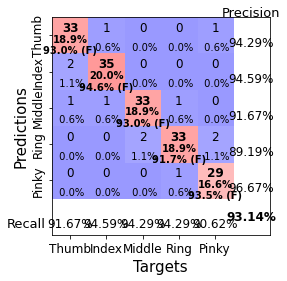

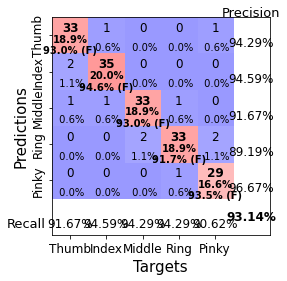

In [78]:
from sklearn.metrics import confusion_matrix
from braindecode.visualization import plot_confusion_matrix

# generate confusion matrices
# get the targets
y_true = valid_set.get_metadata().target
y_pred = clf.predict(valid_set)

# generating confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# add class labels
# label_dict is class_name : str -> i_class : int
# label_dict = valid_set.datasets[0].windows.event_id.items()

label_dict = {
    "Thumb": 0,
    "Index": 1,
    "Middle": 2,
    "Ring": 3,
    "Pinky": 4,
}.items()

# sort the labels by values (values are integer class labels)
labels = list(dict(sorted(list(label_dict), key=lambda kv: kv[1])).keys())

# plot the basic conf. matrix
plot_confusion_matrix(confusion_mat, class_names=labels, with_f1_score=True)

# Saving model

In [ ]:
import torch
torch.save(model.state_dict(), "no_C_percent.pt")